### Basic Information 

In [ ]:
Data: text, images, audio, video {images, audio}, biometric 

Audio Analysis: 

* Audio data are generally not available, pipeline not defined  

* 2 typical stages : 1- preparing the audio data 
                     2- development ( deep learning for audio )
            

When do we use it: 

Audio Classfication 
Speech recognition 
Audio Denoising
Audio Features 

What is sound: viberation of objects, changing the air pressure creating a wave

Sound is a mechanical wave: need a meduim to travel through

Sound is composed of Compressions and Rarefactions


Waveform: frequency , intensity , timbre




All wavefroms: 
preiodic : regualy 
aperiodic: continous , Transient 

frequency : number of cycle per seconds
periodic time : how much it takes to make a cycle
amplitude : higher --> louder


Hearing Range: 20 Hz to 20 kHz
Audio Signal : representation of a sound that has all rep of the sound to reproduce it.

Analog  Signal: Continous values
Digital Signal: sequence of discrete values ( only finite number of values)

    
[--][-][---]          ( dynamic sampling )
[-][-][-][-][-][-][-] ( fixed  sampling  )
sample size = [-][-][-][-][-][-][-]


sample size = [---][---][---][---][---][---][---][---][---] 
sample size = [--][--][--][--][--][--][--][--][--][--][--][--][--]

Analog to digital conversion : sampling , quantization 
pulse code modulation. 

sampling : sample the waves, equal distance in a fixed time in a period.



lower sampling rate vs higher : higher is better Sampling
choosing the best sample size 


Quantization: sampling for amplitude 


How to record sound? 

discription of sound
different audio features --> different aspects 

features:

level of abstraction ( high , mid, low ) 
temporal scope (instantaneous, segments, global)
music aspect
Signal domain (time domain, frequency )

In [1]:
import librosa 
print(librosa.__version__)

0.8.1


In [2]:
# audio libraries:
# pyaudioAnalysis
# pydub
# librosa

In [3]:
y, sr = librosa.load(librosa.util.example_audio_file())
print(len(y), sr)

# y > number of samples
# sr > sample rate 

#every sample: 45/million

1355168 22050


In [4]:
#for i in y:
#    print(i)

In [5]:
# Displays are built with matplotlib 
import matplotlib.pyplot as plt

# Let's make plots pretty
import matplotlib.style as ms
ms.use('seaborn-muted')

# Render figures interactively in the notebook
%matplotlib nbagg

# IPython gives us an audio widget for playback
from IPython.display import Audio

In [6]:
import librosa.display

<IPython.core.display.Javascript object>


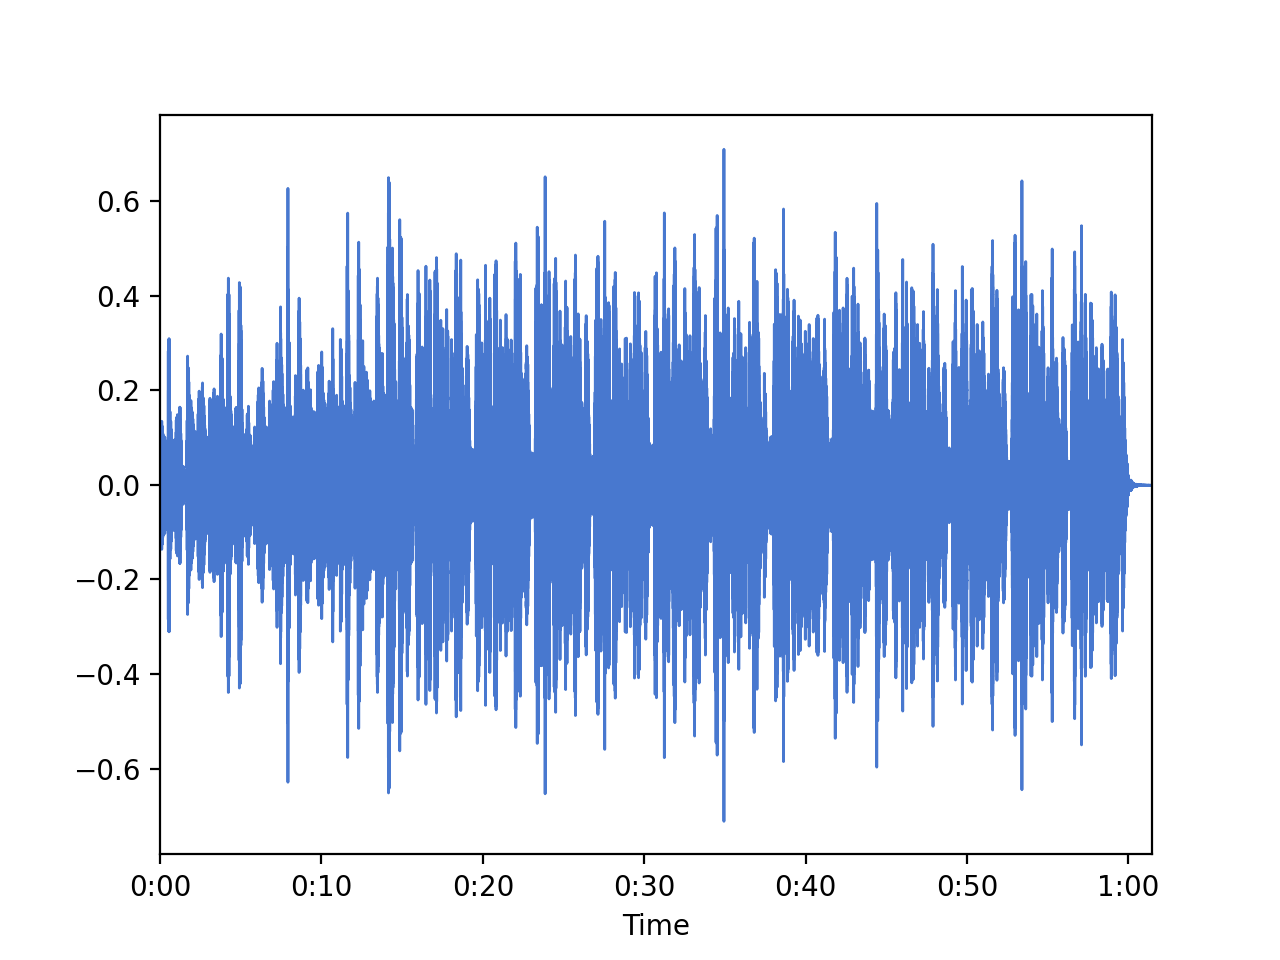

In [7]:
plt.figure()
librosa.display.waveplot(y=y, sr=sr)

<IPython.core.display.Javascript object>


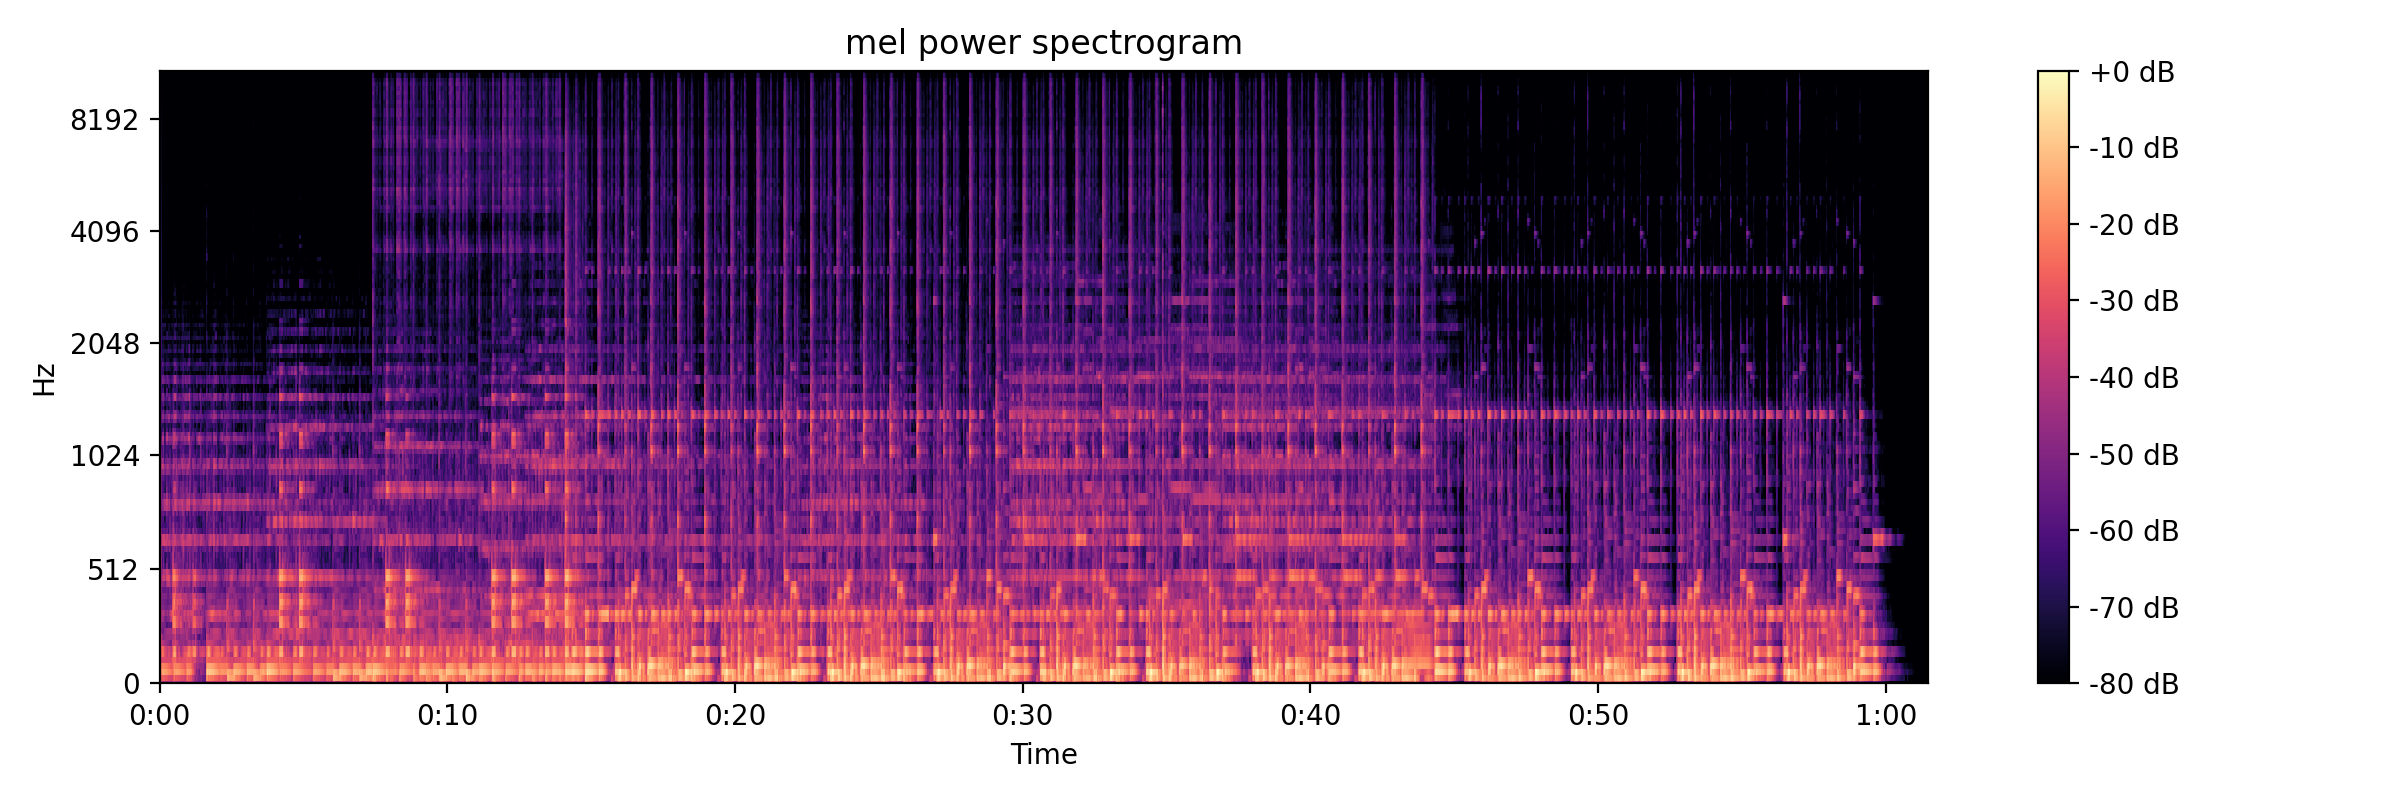

In [8]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [23]:
from IPython.display import Audio
Audio("invalid_keypress.mp3")

In [24]:
x = "invalid_keypress.mp3"
Audio(x)

In [ ]:
signal , sr = librosa.load(x)
print(len(signal) , sr)

#duration of 1 sample
sample_duration = 1 / sr
print(f"{sample_duration: .6f} seconds")

#duration of audio signal in second ( number of mins )
duration = sample_duration * len(signal)
duration

In [ ]:
#visualize the waveform
%matplotlib notebook 
import numpy as np


#fig, ax1,  = plt.subplots(1, 1)
plt.figure(figsize=(10,6))
librosa.display.waveplot(signal, alpha = 0.9) #this is the graph line 
plt.yticks(np.arange(-1,1, .2))
plt.title("invalid_keypress")



### Text to Voice

In [37]:
import pyttsx3
engine = pyttsx3.init()
engine.setProperty('rate', 200)
voices = engine.getProperty('voices')
engine.setProperty('voice', voices[0].id) # 0 = woman's voice 1 = man's voice 
engine.say(input())
engine.runAndWait()

Hi, I am Mohamed from NYU


In [40]:
# Import the required module for text 
# to speech conversion
from gtts import gTTS
  
# This module is imported so that we can 
# play the converted audio
import os
  
# The text that you want to convert to audio
mytext = "السلام عليكم، انا محمد من جامعة نيويورك"
  
# Language in which you want to convert
language = 'ar' # 'ar' for Arabic 
  
# Passing the text and language to the engine, 
# here we have marked slow=False. Which tells 
# the module that the converted audio should 
# have a high speed
myobj = gTTS(text=mytext, lang=language, slow=False) # you can also add accents
  
# Saving the converted audio in a mp3 file named
# welcome 
myobj.save("welcome.mp3")
  
# Playing the converted file
Audio("welcome.mp3")

In [ ]:
# Python program to translate
# speech to text and text to speech


import speech_recognition as sr
import pyttsx3

# Initialize the recognizer
r = sr.Recognizer()

# Function to convert text to
# speech
def SpeakText(command):
	
	# Initialize the engine
	engine = pyttsx3.init()
	engine.say(command)
	engine.runAndWait()
	
	
# Loop infinitely for user to
# speak

while(1):	
	
	# Exception handling to handle
	# exceptions at the runtime
	try:
		
		# use the microphone as source for input.
		with sr.Microphone() as source2:
			
			# wait for a second to let the recognizer
			# adjust the energy threshold based on
			# the surrounding noise level
			r.adjust_for_ambient_noise(source2, duration=0.2)
			
			#listens for the user's input
			audio2 = r.listen(source2)
			
			# Using ggogle to recognize audio
			MyText = r.recognize_google(audio2)
			MyText = MyText.lower()

			print("Did you say "+MyText)
			SpeakText(MyText)
			
	except sr.RequestError as e:
		print("Could not request results; {0}".format(e))
		
	except sr.UnknownValueError:
		print("unknown error occured")
